<a href="https://colab.research.google.com/github/alhamhotaki/ANN_Health-Sector/blob/main/ANN_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap


In [25]:
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
cmap_light = ListedColormap(['#FFBBBB', '#BBBBFF'])


In [26]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Cirrhosis.csv')
data

,index,duration,status,drug,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
0,1,400,2,1,21464,1,1,1,1,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,2,4500,0,1,20617,1,0,1,1,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,3,1012,2,1,25594,0,0,0,0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,4,1925,2,1,19994,1,0,1,1,0.5,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,5,1504,1,2,13918,1,0,1,1,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,0,1,22347,1,0,1,0,0.0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2
308,309,994,0,2,21294,1,0,0,0,0.0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2
309,310,939,0,1,22767,1,0,0,0,0.0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2
310,311,839,0,1,13879,1,0,0,0,0.0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2


# Overview of Dataset
The dataset of cirrhosis contains clinical trial data from the Mayo Clinic's study on Primary Biliary Cirrhosis (PBC) conducted between 1974 and 1984. Here is an overview of the variables included in the dataset:
* case number: Identification number for each patient.
* time: Number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986.
* status: Coded as:
0 = censored,
1 = censored due to liver transplantation,
2 = death.
* drug: 1 = D-penicillamine, 2 = placebo.
* age: In days.
* sex: 0 = male, 1 = female.
* ascites: Presence of ascites (fluid buildup in the abdomen) coded as 0 = no, 1 = yes.
* hepatomegaly: Presence of an enlarged liver coded as 0 = no, 1 = yes.
* spiders: Presence of spider angiomata (small, spider-like blood vessels) coded as 0 = no, 1 = yes.
* edema: Coded as:
0 = no edema and no diuretic therapy for edema, 0.5 = edema present without diuretics, or edema resolved by diuretics,
1 = edema despite diuretic therapy.
* bilirubin: Serum bilirubin in mg/dl.
* cholesterol: Serum cholesterol in mg/dl.
* albumin: Serum albumin in gm/dl.
* copper: Urine copper in ug/day.
* alkaline phosphatase: Enzyme level in U/liter.
* SGOT: Serum glutamic-oxaloacetic transaminase (SGOT) in U/ml.
* triglycerides: Triglycerides in mg/dl.
* platelets: Platelets per cubic ml / 1000.
* prothrombin time: Prothrombin time in seconds.
* stage: Histologic stage of the disease.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          312 non-null    int64  
 1   duration       312 non-null    int64  
 2   status         312 non-null    int64  
 3   drug           312 non-null    int64  
 4   age            312 non-null    int64  
 5   sex            312 non-null    int64  
 6   ascites        312 non-null    int64  
 7   hepatomology   312 non-null    int64  
 8   spiders        312 non-null    int64  
 9   edema          312 non-null    float64
 10  bilirubin      312 non-null    float64
 11  cholesterol    284 non-null    float64
 12  albumin        312 non-null    float64
 13  copper         310 non-null    float64
 14  phosphatase    312 non-null    float64
 15  SGOT           312 non-null    float64
 16  triglicerides  282 non-null    float64
 17  platelets      308 non-null    float64
 18  prothrombi

In [28]:
data.describe()

,index,duration,status,drug,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,284.000000,312.000000,310.000000,312.000000,312.000000,282.000000,308.000000,312.000000,312.000000
mean,156.500000,2006.362179,0.862179,1.493590,18269.442308,0.884615,0.076923,0.512821,0.288462,0.110577,3.256090,369.510563,3.520000,97.648387,1982.655769,122.556346,124.702128,261.935065,10.725641,3.032051
std,90.210864,1123.280843,0.960764,0.500762,3864.805407,0.319999,0.266897,0.500639,0.453775,0.274507,4.530315,231.944545,0.419892,85.613920,2140.388824,56.699525,65.148639,95.608742,1.004323,0.877880
min,1.000000,41.000000,0.000000,1.000000,9598.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,78.750000,1191.000000,0.000000,1.000000,15427.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.800000,249.500000,3.310000,41.250000,871.500000,80.600000,84.250000,199.750000,10.000000,2.000000
50%,156.500000,1839.500000,0.000000,1.000000,18187.500000,1.000000,0.000000,1.000000,0.000000,0.000000,1.350000,309.500000,3.550000,73.000000,1259.000000,114.700000,108.000000,257.000000,10.600000,3.000000
75%,234.250000,2697.250000,2.000000,2.000000,20715.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.425000,400.000000,3.800000,123.000000,1980.000000,151.900000,151.000000,322.500000,11.100000,4.000000
max,312.000000,4556.000000,2.000000,2.000000,28650.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000


## Handling Missing Values:
We will fill the missing values with mean of that specific feature.

In [29]:
missing_values = data.isnull().sum()

missing_values

,0
index,0
duration,0
status,0
drug,0
age,0
sex,0
ascites,0
hepatomology,0
spiders,0
edema,0


In [30]:
data.fillna(data.mean(), inplace=True)

missing_values_after_fill = data.isnull().sum()

missing_values_after_fill

,0
index,0
duration,0
status,0
drug,0
age,0
sex,0
ascites,0
hepatomology,0
spiders,0
edema,0


## A brief exploratory analysis of Data

<Figure size 1600x1200 with 0 Axes>

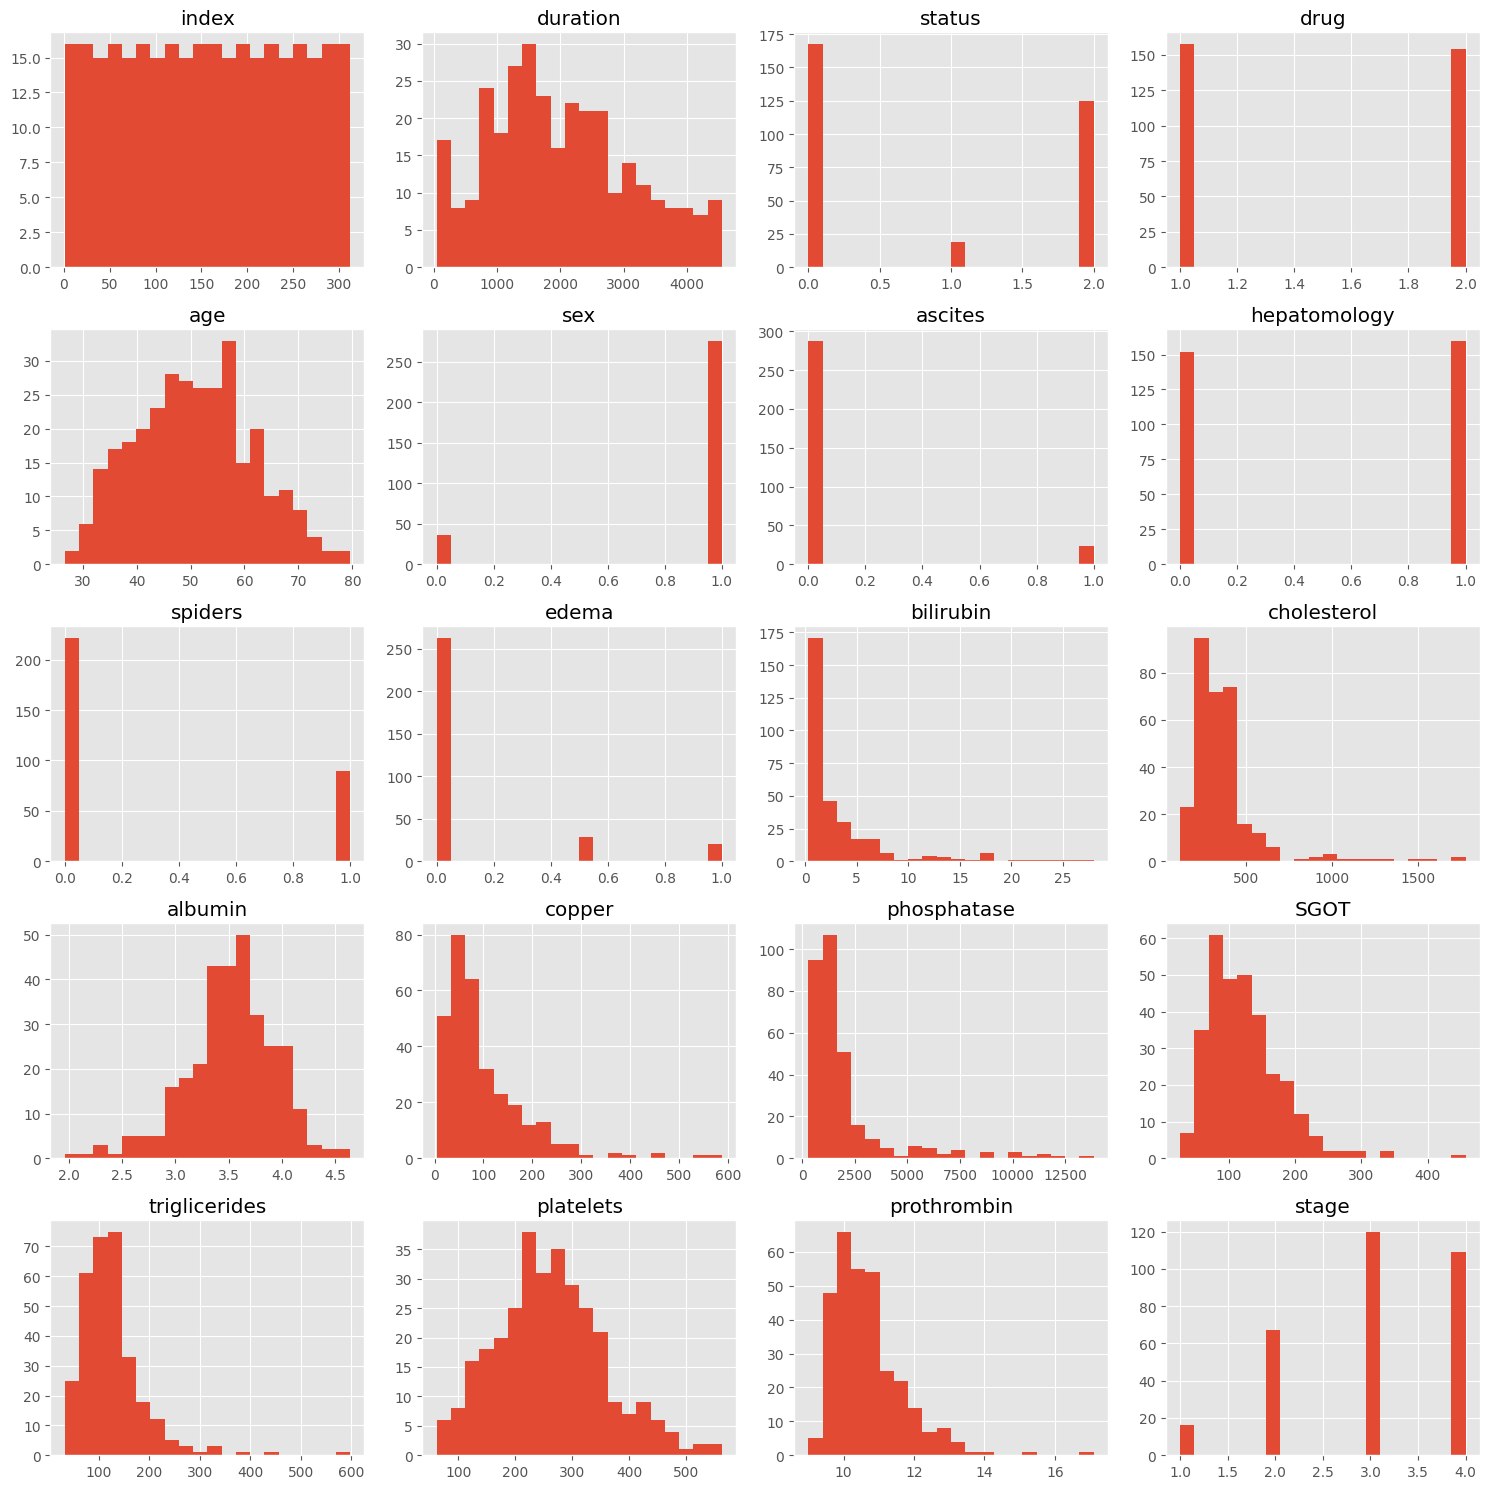

In [31]:
data['age'] = data['age']/360

plt.figure(figsize=(16, 12))
plt.style.use('ggplot')
data.hist(bins=20, figsize=(15, 15))
plt.tight_layout()
plt.show()

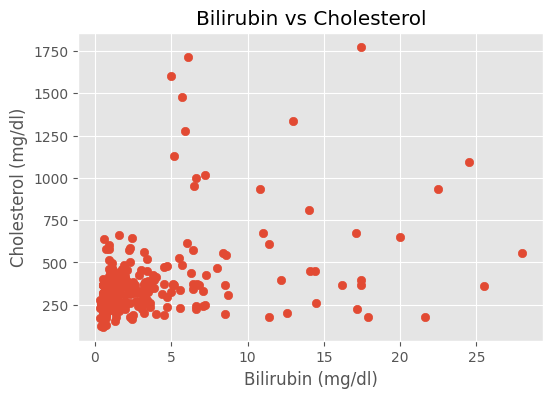

In [32]:
plt.figure(figsize=(6, 4))
plt.scatter(data['bilirubin'], data['cholesterol'])
plt.title('Bilirubin vs Cholesterol')
plt.xlabel('Bilirubin (mg/dl)')
plt.ylabel('Cholesterol (mg/dl)')
plt.show()

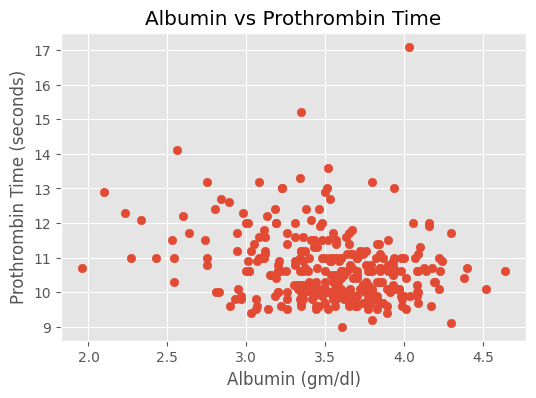

In [33]:
plt.figure(figsize=(6, 4))
plt.scatter(data['albumin'], data['prothrombin'])
plt.title('Albumin vs Prothrombin Time')
plt.xlabel('Albumin (gm/dl)')
plt.ylabel('Prothrombin Time (seconds)')
plt.show()

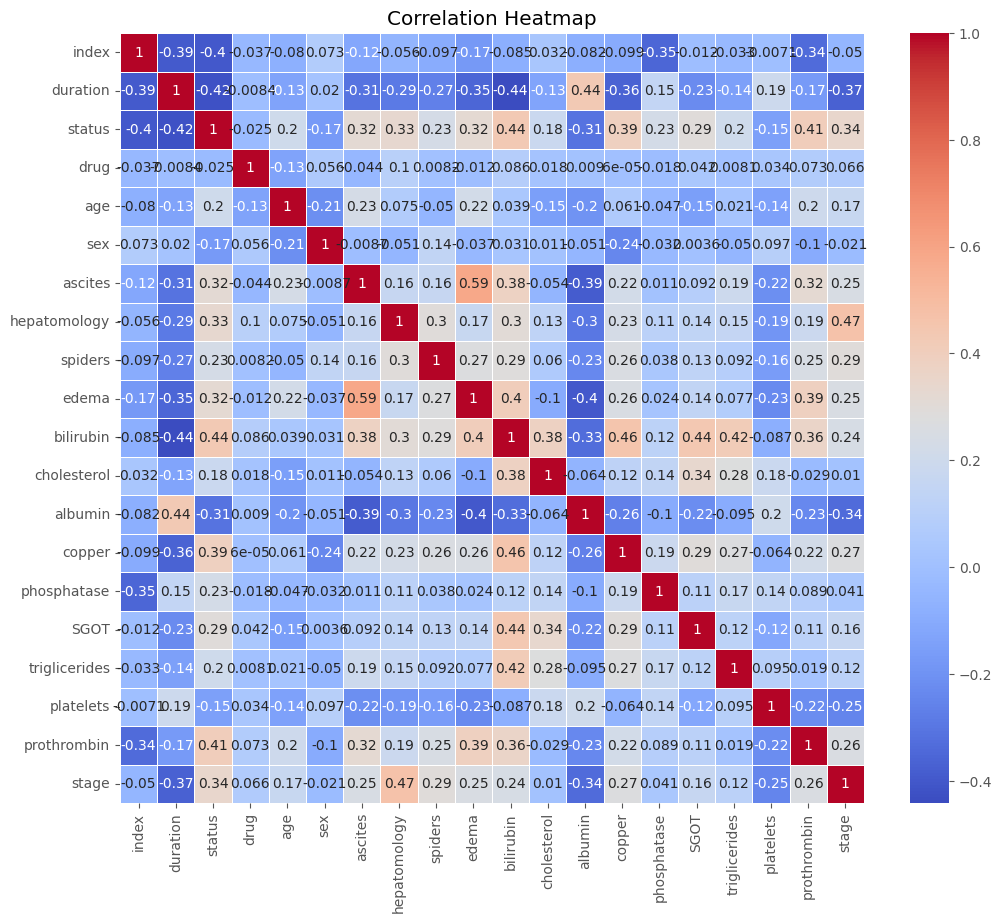

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

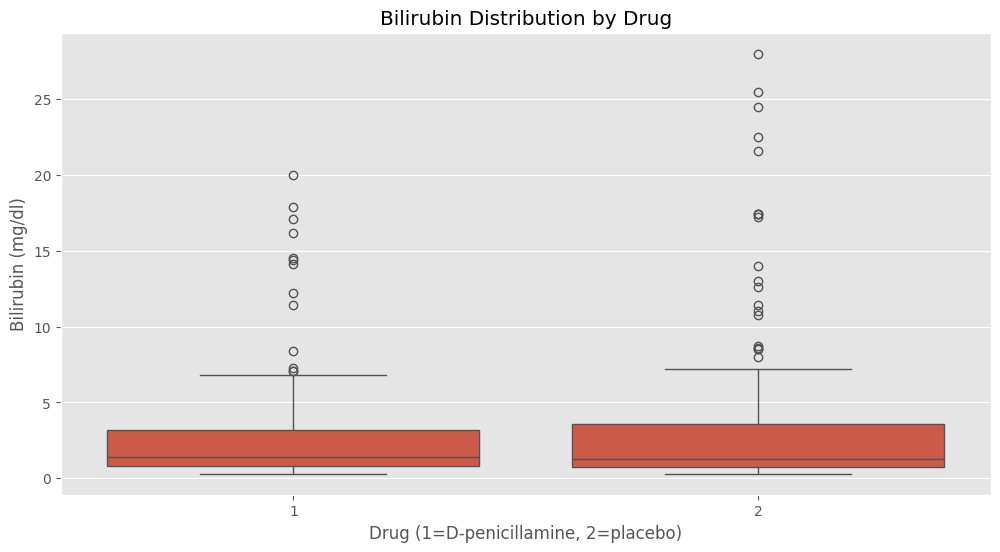

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='drug', y='bilirubin', data=data)
plt.title('Bilirubin Distribution by Drug')
plt.xlabel('Drug (1=D-penicillamine, 2=placebo)')
plt.ylabel('Bilirubin (mg/dl)')
plt.show()

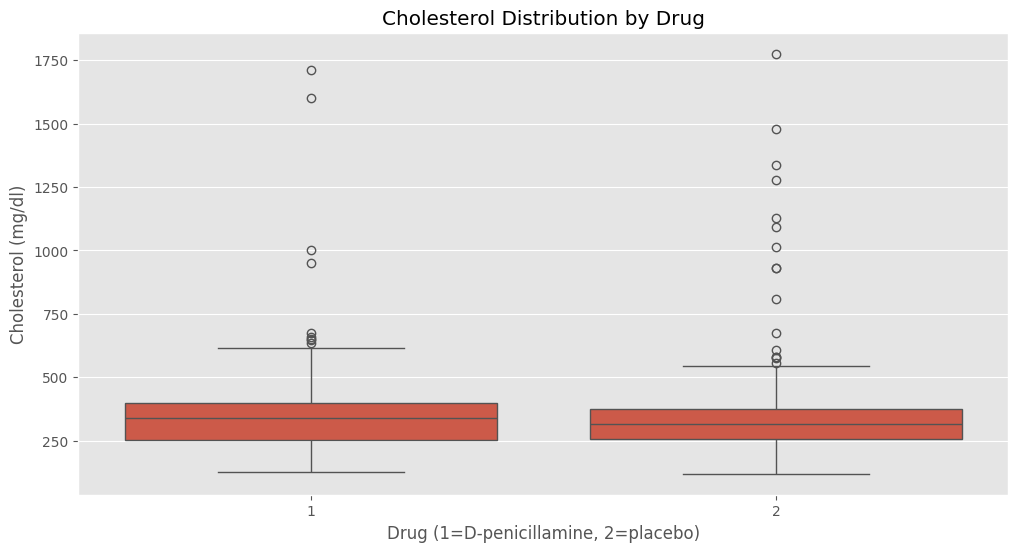

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='drug', y='cholesterol', data=data)
plt.title('Cholesterol Distribution by Drug')
plt.xlabel('Drug (1=D-penicillamine, 2=placebo)')
plt.ylabel('Cholesterol (mg/dl)')
plt.show()

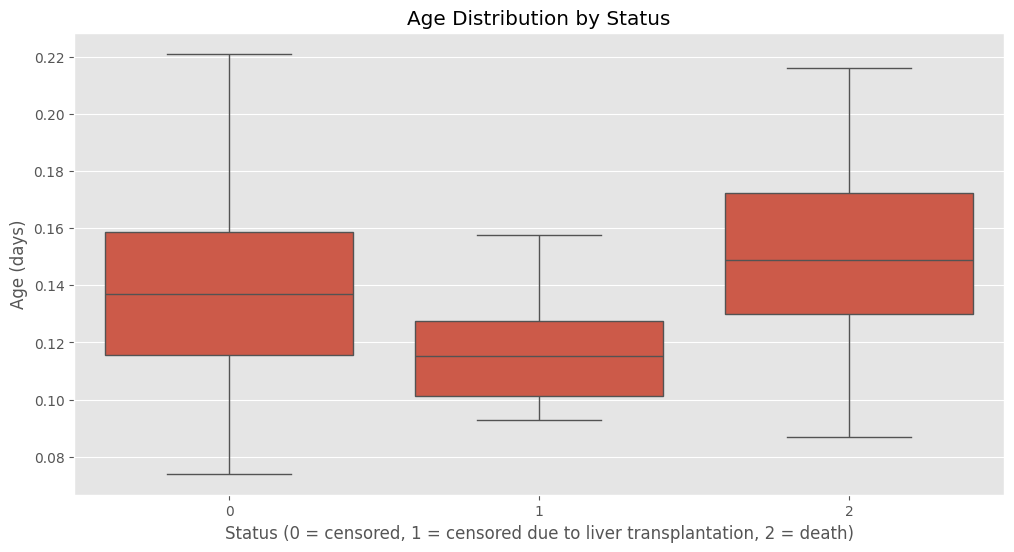

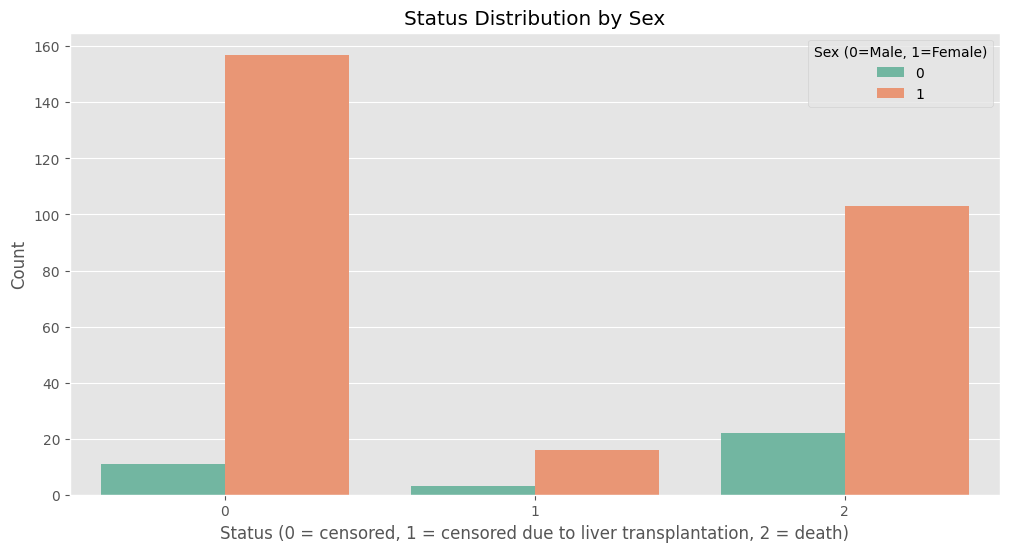

In [37]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='status', y='age', data=data)
plt.title('Age Distribution by Status')
plt.xlabel('Status (0 = censored, 1 = censored due to liver transplantation, 2 = death)')
plt.ylabel('Age (days)')
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(x='status', hue='sex', data=data, palette='Set2')
plt.title('Status Distribution by Sex')
plt.xlabel('Status (0 = censored, 1 = censored due to liver transplantation, 2 = death)')
plt.ylabel('Count')
plt.legend(title='Sex (0=Male, 1=Female)')
plt.show()


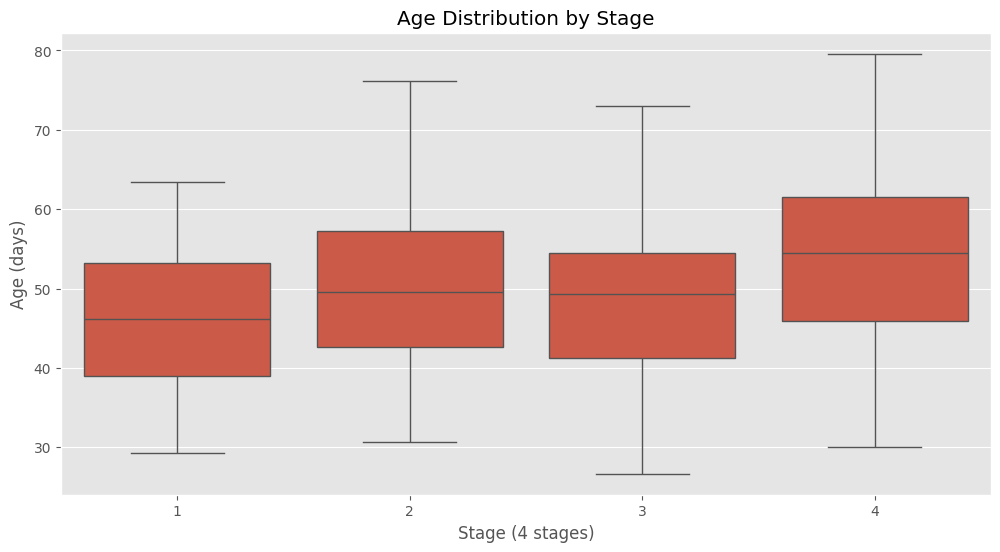

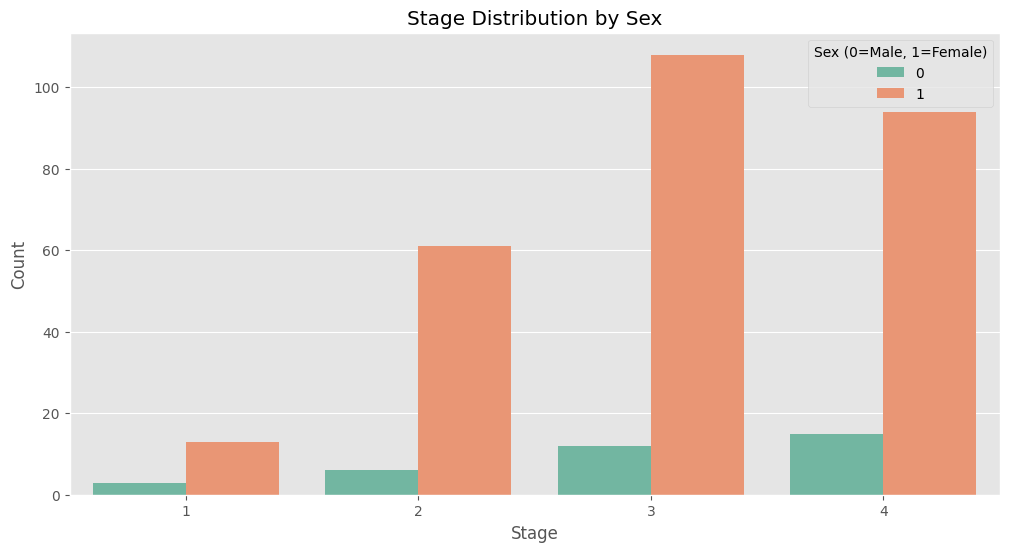

In [45]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='stage', y='age', data=data)
plt.title('Age Distribution by Stage')
plt.xlabel('Stage (4 stages)')
plt.ylabel('Age (days)')
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(x='stage', hue='sex', data=data, palette='Set2')
plt.title('Stage Distribution by Sex')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.legend(title='Sex (0=Male, 1=Female)')
plt.show()


# Target and Features

## Status
The status variable is critical since it indicates whether a patient's outcome was censored, censored due to liver transplantation, or death.

We will visualise and provide insights based on this variable. Specifically, we can look at:

* The distribution of the status variable.
* How key clinical features (e.g., bilirubin, albumin) differ by status.
* Box plots to compare distributions of key variables (bilirubin, cholesterol, etc.) for different status categories.

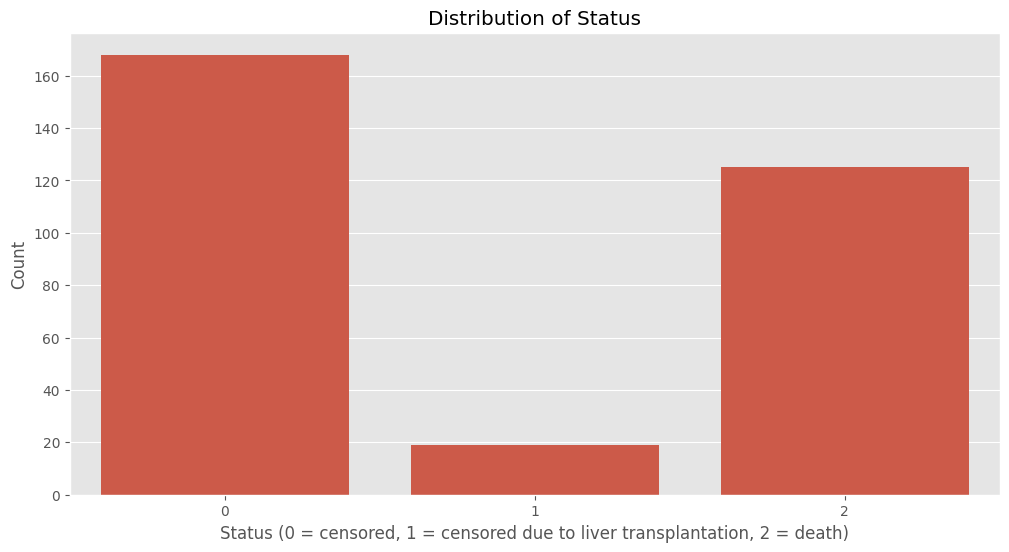

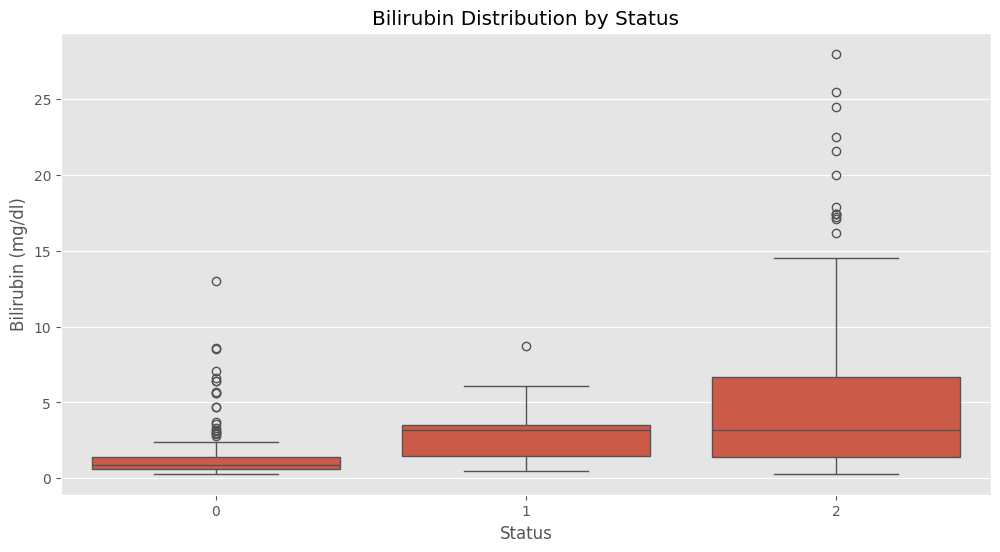

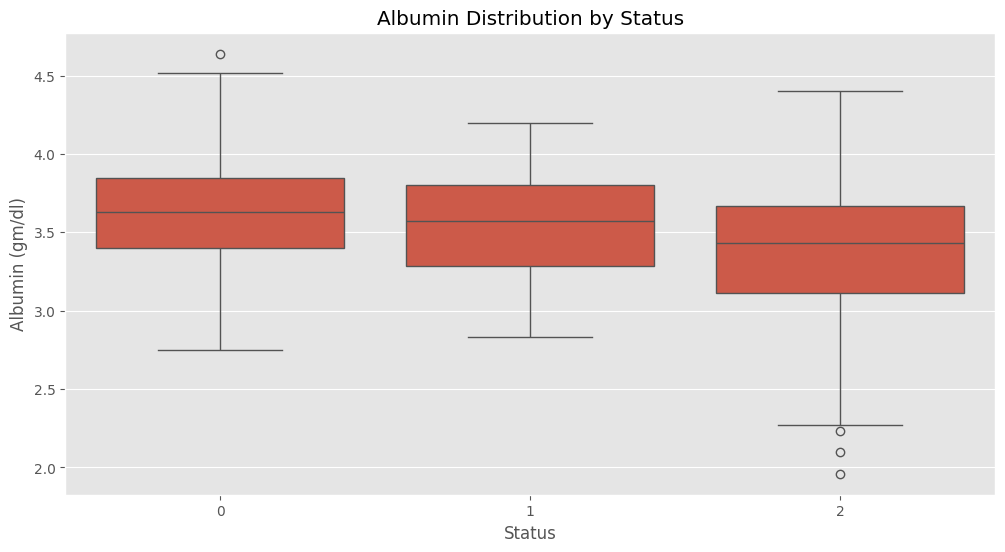

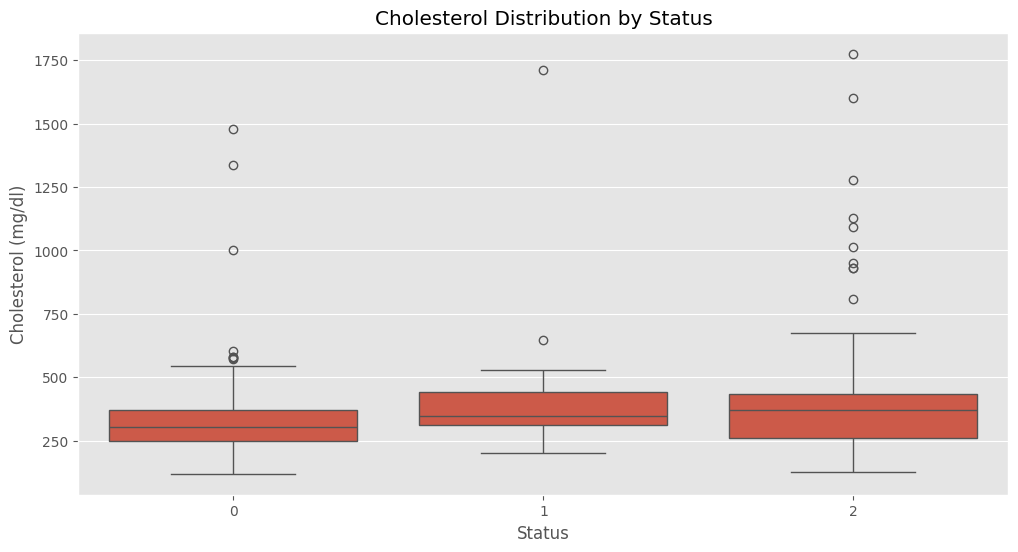

In [39]:

plt.figure(figsize=(12, 6))
sns.countplot(x='status', data=data)
plt.title('Distribution of Status')
plt.xlabel('Status (0 = censored, 1 = censored due to liver transplantation, 2 = death)')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x='status', y='bilirubin', data=data)
plt.title('Bilirubin Distribution by Status')
plt.xlabel('Status')
plt.ylabel('Bilirubin (mg/dl)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='status', y='albumin', data=data)
plt.title('Albumin Distribution by Status')
plt.xlabel('Status')
plt.ylabel('Albumin (gm/dl)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='status', y='cholesterol', data=data)
plt.title('Cholesterol Distribution by Status')
plt.xlabel('Status')
plt.ylabel('Cholesterol (mg/dl)')
plt.show()


Here are additional insights based on the status column:

1. Distribution of Status: The count plot shows the distribution of patient outcomes, with three possible statuses:

  * 0 = censored,
  * 1 = censored due to liver transplantation,
  * 2 = death.
2. Bilirubin by Status: The box plot indicates higher levels of bilirubin among patients who died (status = 2) compared to those who were censored or had a liver transplant.

3. Albumin by Status: Albumin levels appear lower among patients who died, which suggests a relationship between low albumin and worse outcomes.

4. Cholesterol by Status: Cholesterol levels show more variation, but there seems to be a trend of slightly higher cholesterol levels in patients who died.

These visualizations highlight how key clinical features (bilirubin, albumin, and cholesterol) differ based on patient outcomes, which could be important for understanding disease progression.

## Stage:
Let’s now examine the relationship between the stage of the disease and the status (outcome) of the patients. The stage variable represents the histologic stage of the disease, which can indicate disease progression. We will visualize:

1. The distribution of the stage variable.
2. Box plots comparing stage by status to see how the disease stage affects the outcome.

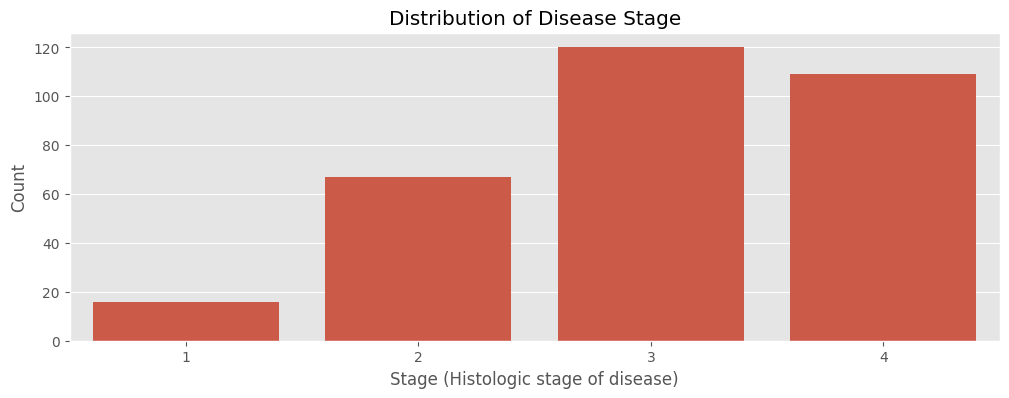

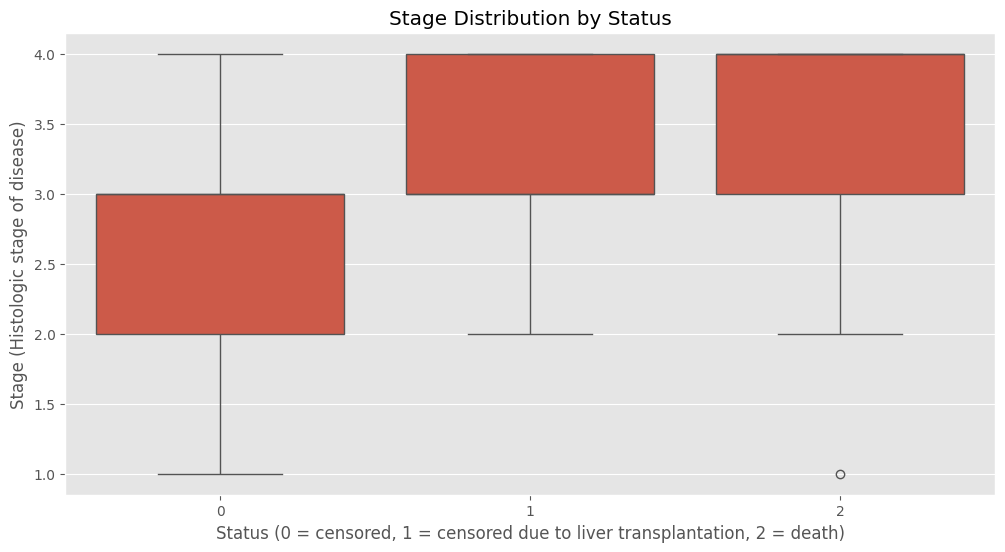

In [40]:

plt.figure(figsize=(12, 4))
sns.countplot(x='stage', data=data)
plt.title('Distribution of Disease Stage')
plt.xlabel('Stage (Histologic stage of disease)')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x='status', y='stage', data=data)
plt.title('Stage Distribution by Status')
plt.xlabel('Status (0 = censored, 1 = censored due to liver transplantation, 2 = death)')
plt.ylabel('Stage (Histologic stage of disease)')
plt.show()


Here are the insights based on the relationship between stage and status:

1. Distribution of Disease Stage: The count plot shows how patients are distributed across different histologic stages of the disease.

2. Stage Distribution by Status: The box plot reveals that patients who died (status = 2) tend to have higher disease stages compared to those who were censored or had a liver transplant. This suggests a correlation between advanced disease stage and worse outcomes.

## Feature importance analysis
For this, we will use a decision tree classifier and visualize the feature importances, which will help identify which variables have the most significant impact on predicting the status of patients and stages of their disease.


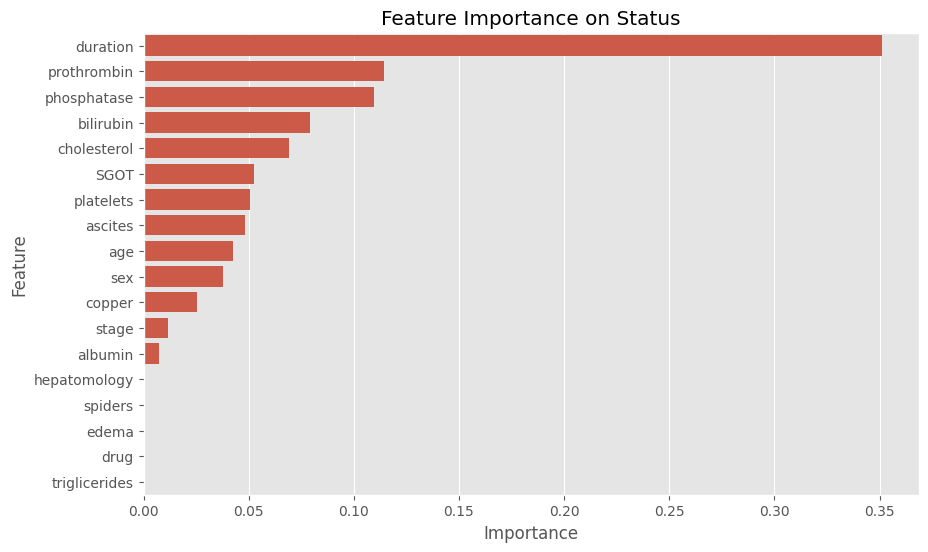

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = data.drop(columns=['status', 'index'])
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)


feature_importances = clf.feature_importances_


features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features)
plt.title('Feature Importance on Status')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


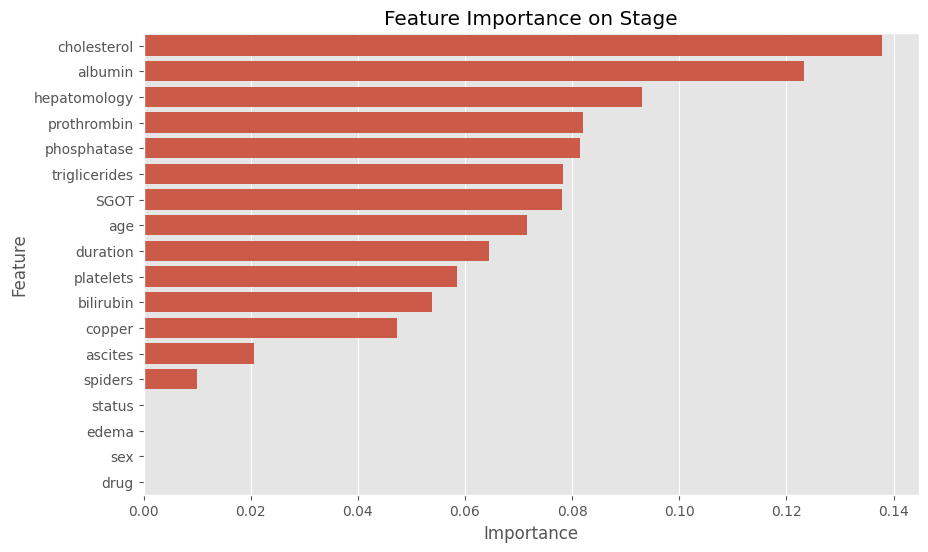

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = data.drop(columns=['stage', 'index'])
y = data['stage']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)


feature_importances = clf.feature_importances_


features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features)
plt.title('Feature Importance on Stage')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# The ANN Model:
We will develop an ANN model to predict the stage of the disease based on the important features.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Activation functions
def ReLU(H):
    return np.maximum(0, H)

def softmax(H):
    H = np.array(H)
    eH = np.exp(H - np.max(H, axis=1, keepdims=True))
    return eH / np.sum(eH, axis=1, keepdims=True)

# Loss Functions
def cross_entropy(Y, P_hat):
    return -np.mean(Y * np.log(P_hat))

# Metrics
def accuracy(y, y_hat):
    return np.mean(y == y_hat)


def one_hot(y, num_classes=4):
    y = y - y.min()
    N = len(y)
    Y = np.zeros((N, num_classes))
    for i in range(N):
        Y[i, y[i]] = 1
    return Y


def derivative(Z, a):
    if a == ReLU:
        return (Z > 0).astype(int)
    else:
        raise ValueError("Unknown Activation")


class ANN():
    def __init__(self, architecture, activations=None, mode=0):
        self.mode = mode
        self.architecture = architecture
        self.activations = activations
        self.L = len(architecture) + 1

    def fit(self, X, y, eta=1e-5, epochs=1e4, show_curve=False):
        epochs = int(epochs)
        Y = one_hot(y)
        K = Y.shape[1]

        N, D = X.shape


        self.W = {l: np.random.randn(M[0], M[1]) for l, M in enumerate(zip(([D] + self.architecture), (self.architecture + [K])), 1)}
        self.B = {l: np.random.randn(M) for l, M in enumerate(self.architecture + [K], 1)}


        if self.activations is None:
            self.a = {l: ReLU for l in range(1, self.L)}
        else:
            self.a = {l: act for l, act in enumerate(self.activations, 1)}


        self.a[self.L] = softmax


        J = np.zeros(epochs)


        for epoch in range(epochs):
            self.__forward__(X)


            J[epoch] = cross_entropy(Y, self.Z[self.L])


            dH = (1 / N) * (self.Z[self.L] - Y)
            for l in sorted(self.W.keys(), reverse=True):
                dW = self.Z[l - 1].T @ dH
                dB = dH.sum(axis=0)

                self.W[l] -= eta * dW
                self.B[l] -= eta * dB

                if l > 1:
                    dZ = dH @ self.W[l].T
                    dH = dZ * derivative(self.Z[l - 1], self.a[l - 1])

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("Epochs")
            plt.ylabel("Loss")
            plt.title("Training Curve")
            plt.show()

    def __forward__(self, X):
        self.Z = {0: X}
        for l in sorted(self.W.keys()):
            self.Z[l] = self.a[l](self.Z[l - 1] @ self.W[l] + self.B[l])

    def predict(self, X):
        self.__forward__(X)
        return self.Z[self.L].argmax(axis=1)




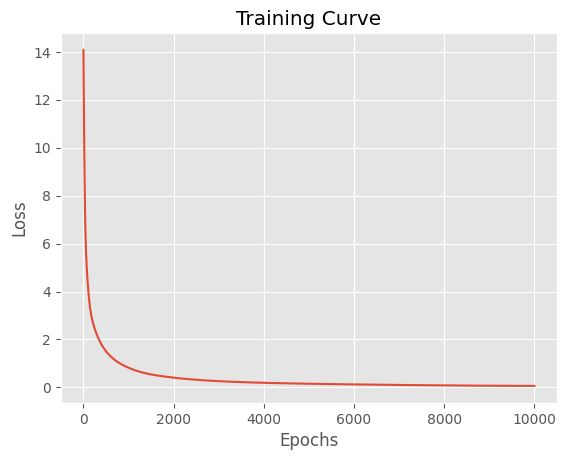

Overall Training Accuracy: 0.9423
Enter bilirubin (range 0.30 - 28.00): 22
Enter albumin (range 1.96 - 4.64): 3
Enter age (range 26.66 - 79.58): 29
Enter prothrombin (range 9.00 - 17.10): 12
Enter cholesterol (range 120.00 - 1775.00): 150
Enter SGOT (range 26.35 - 457.25): 300
Enter platelets (range 62.00 - 563.00): 70
Enter hepatomology (range 0.00 - 1.00): 0
Predicted Stage of the disease: 3


In [44]:

def predict_stage(ann, scaler):

    min_max_ranges = {}
    for feature in features:
        min_val = data[feature].min()
        max_val = data[feature].max()
        min_max_ranges[feature] = (min_val, max_val)

    input_data = []
    for feature in features:
        val = float(input(f"Enter {feature} (range {min_max_ranges[feature][0]:.2f} - {min_max_ranges[feature][1]:.2f}): "))
        input_data.append(val)


    input_data = np.array(input_data).reshape(1, -1)
    input_data = scaler.transform(input_data)

    stage = ann.predict(input_data)
    print(f"Predicted Stage of the disease: {stage[0]}")


def load_and_run_ann():
    global features
    features = ['bilirubin', 'albumin', 'age', 'prothrombin', 'cholesterol', 'SGOT', 'platelets', 'hepatomology']
    X = data[features].to_numpy()
    y = data['stage'].to_numpy() - 1


    scaler = StandardScaler()
    X = scaler.fit_transform(X)


    ann = ANN(architecture=[64, 32], activations=[ReLU, ReLU], mode=0)
    ann.fit(X, y, eta=1e-3, epochs=10000, show_curve=True)


    y_hat = ann.predict(X)
    overall_accuracy = accuracy(y, y_hat)
    print(f"Overall Training Accuracy: {overall_accuracy:.4f}")

    predict_stage(ann, scaler)


load_and_run_ann()